In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
CO2_data = pd.read_csv("https://raw.githubusercontent.com/owid/co2-data/master/owid-co2-data.csv")
CO2_data = CO2_data.dropna(subset=['country'])
CO2_data = CO2_data.dropna(subset=['year'])
CO2_data = CO2_data.dropna(subset=['population'])
CO2_data = CO2_data.dropna(subset=['co2'])
CO2_data = CO2_data.dropna(subset=['co2_per_capita'])
CO2_data = CO2_data.dropna(subset=['gdp'])




necessary imports and data cleaning

In [45]:
CO2_data.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
200,Afghanistan,1950,AFG,7776182.0,9.421400e+09,0.0,0.0,0.084,0.070,475.000,...,NaN,0.128,0.0,0.0,0.001,0.0,19.447,1.453,NaN,NaN
201,Afghanistan,1951,AFG,7879343.0,9.692280e+09,0.0,0.0,0.092,0.007,8.696,...,NaN,0.128,0.0,0.0,0.001,0.0,20.458,1.473,NaN,NaN
202,Afghanistan,1952,AFG,7987783.0,1.001733e+10,0.0,0.0,0.092,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,21.356,1.484,NaN,NaN
203,Afghanistan,1953,AFG,8096703.0,1.063052e+10,0.0,0.0,0.106,0.015,16.000,...,NaN,0.128,0.0,0.0,0.001,0.0,22.361,1.517,NaN,NaN
204,Afghanistan,1954,AFG,8207953.0,1.086636e+10,0.0,0.0,0.106,0.000,0.000,...,NaN,0.128,0.0,0.0,0.001,0.0,23.256,1.534,NaN,NaN


checked the first 5 rows to make sure the table was properly added


In [46]:
co2_total_data = CO2_data[['year','co2']].loc[CO2_data['iso_code'].str.len() == 3]
co2_total_data.head()

,year,co2
200,1950,0.084
201,1951,0.092
202,1952,0.092
203,1953,0.106
204,1954,0.106


created a data frame to analyize carbon dioxide emissions over time


In [47]:
co2_total_data.tail()

,year,co2
50185,2018,11.205
50186,2019,10.263
50187,2020,8.495
50188,2021,10.204
50189,2022,10.425


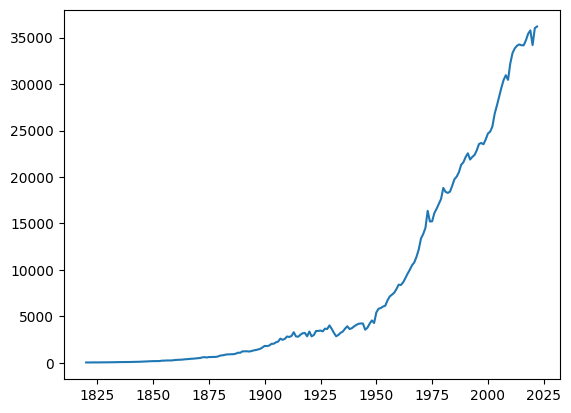

In [48]:
co2_total_data.index = co2_total_data['year']
co2_total_data = co2_total_data.drop(columns=['year'])
co2_total_data = co2_total_data.groupby(co2_total_data.index).sum()
plt.plot(co2_total_data)
plt.show()


This a graph of carbon dioxide emissions over the years.

*   From this graph we can observe that carbon dioxide emmissions have been growing exponentially over the years.
*   In the graph we see small dips around the 1930s and 2020s. These are not representative of the overall trend as the 1930s had the great depression which caused economic hardship in the world which in turn reduced co2 emmissions for that year. In 2020 the COVID 19 pandemic occured which made people stay at home and not travel as much which caused a dip.





,co2
country,
China,11350.538
United States,5078.871
India,2831.166
Russia,1802.190
Japan,1032.687
Iran,800.747
Indonesia,737.073
Saudi Arabia,723.331
Germany,671.472


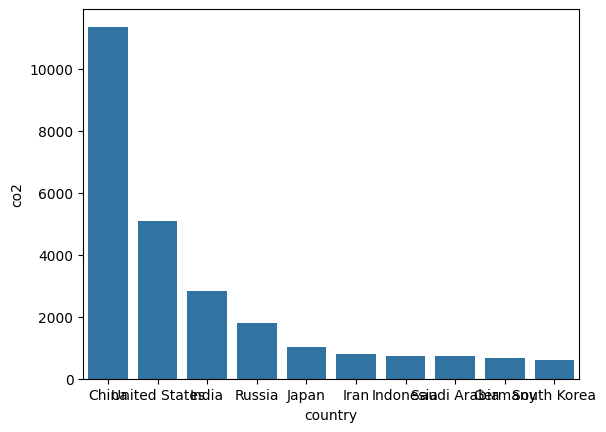

In [49]:
country_total_co2 = CO2_data[['country','co2']].loc[(CO2_data['iso_code'].str.len() == 3) & (CO2_data['year'] == CO2_data['year'].max())]
country_total_co2.index = country_total_co2['country']
country_total_co2 = country_total_co2.drop(columns=['country'])
country_total_co2 = country_total_co2.sort_values(by=['co2'],ascending=False)
country_total_co2 = country_total_co2[0:10]
sns.barplot(data=country_total_co2,x="country",y="co2")


This is a bar chart of carbon dioxide emmissions for the top 10 highest carbon dioxide producers in the world in 2022


*   From this chart it can be observed that china has carbon dioxide emmissions that are way higher than other countries in the world.
*   In this chart it can also be ovserved that the top 3 countries have a significant higher carbon dioxide emmissions than other countries in the chart.






<Axes: xlabel='country', ylabel='co2_per_capita'>

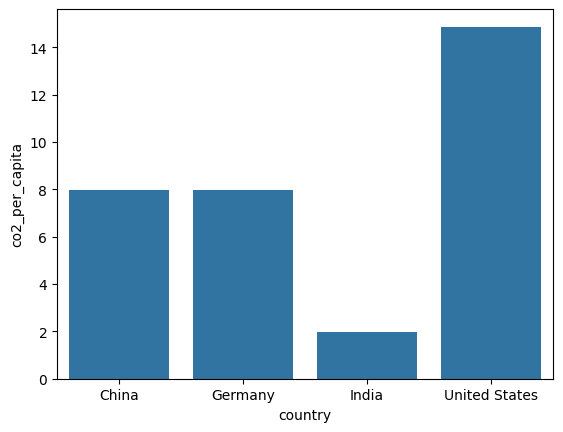

In [50]:
co2_per_capita = CO2_data[['country','co2_per_capita']].loc[(CO2_data['iso_code'].str.len() == 3) & ((CO2_data['country'] == 'United States') | (CO2_data['country'] == 'India') | (CO2_data['country'] == 'China')| (CO2_data['country'] == 'Germany')) &(CO2_data['year'] == CO2_data['year'].max())]
co2_per_capita.index = co2_per_capita['country']
co2_per_capita = co2_per_capita.drop(columns=['country'])
sns.barplot(data=co2_per_capita, x='country',y='co2_per_capita')


This barplot shows the co2 per capita for China Germany India and the United states in 2022.
*   This graph shows that the United States has the highest co2 per capita out of these 4 countries.
*  Even though china had a higher carbon dioxide emmisions in 2022 than the US expressed in the graph of the top 10 highest carbon dioxide producers people in the US produce more carbon dioxide than people in China. From this we can say that China's carbon dioxide emmissions can be partially attriubtted to its population size while the US carbon dioxide emmission can be atributed to the lifestyle of people in America




<Axes: xlabel='None'>

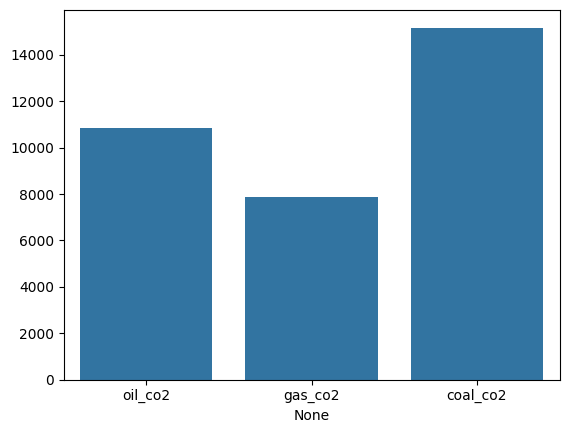

In [51]:
CO2_data.columns
source_CO2_emmissions = CO2_data[['oil_co2','gas_co2','coal_co2']].loc[(CO2_data['iso_code'].str.len() == 3) & (CO2_data['year'] == CO2_data['year'].max())]
source_CO2_emmissions = source_CO2_emmissions.sum()
sns.barplot(x=source_CO2_emmissions.index,y=source_CO2_emmissions.values)


This bar chart shows the carbon dioxide emmissions for fossil fuels


*   From this chart it can be observed that coal is the fossil fuel that contributes to the highest production of carbon dioxide.
*   Since China relies on coal for production of electricity, it is also another reason why china's carbon dioxide emmisions is so high.

